In [1]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


Up/Down Sampling

In [2]:
#Reading CSV File, Building_01, which is actually building_0000 
df =  pd.read_csv('building_117_roof_01_door01_modified.csv', header=0, names = ['X','Y','Z','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
#df1 = df.dropna() 
#df2 = df1.values

#print(df2[:, 15])
from sklearn.utils import resample 
df_majority = df[df.Type == 'roof']
df_minority = df[df.Type == 'door'] 

#print(df_majority)
#upsampling majority class 

df_minority_upsampled = resample(df_minority, replace = True, n_samples = 17800, random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#display class counts 
df_upsampled.Type.value_counts()


roof    17800
door    17800
Name: Type, dtype: int64

In [3]:
#Reading CSV File #1 
df_a = pd.read_csv('building_117_roof_01_door01_modified.csv',sep = ',')
df_a1 = df_a.dropna() 
df_a2 = df_a1.values

Sanity Check

In [4]:
#Checking to see if everything is working 
#df.info()
#df.head(3)
#classifier_count = df['Classification'].value_counts().to_frame()
#classifier_count.head(2)

df_a.info()
#df_a.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17877 entries, 0 to 17876
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  17877 non-null  float64
 1   Y                  17877 non-null  float64
 2   Z                  17877 non-null  float64
 3   R                  17877 non-null  int64  
 4   G                  17877 non-null  int64  
 5   B                  17877 non-null  int64  
 6   Point_Source_ID    17877 non-null  int64  
 7   Scan_Angle_Rank    17877 non-null  int64  
 8   Flightline_Edge    17877 non-null  int64  
 9   Scan_Direction     17877 non-null  int64  
 10  Number_of_Returns  17877 non-null  int64  
 11  Return_Number      17877 non-null  int64  
 12  Time               17877 non-null  float64
 13  Intensity          17877 non-null  int64  
 14  Classification     17877 non-null  int64  
 15  Type               17877 non-null  object 
dtypes: float64(4), int64(1

In [5]:
#without upsampling
#I will use all the attributes (building_000000 CSV)
#x = df2[:, :14] 
#y = df2[:, 14]

#with upsampling 
x = df_upsampled.drop('Type', axis = 1)
#print(x)
y = df_upsampled.Type
#print(y)
print(x.shape,y.shape)

(35600, 12) (35600,)


In [6]:
#Reading CSV File #2 
df_a = pd.read_csv('building_02_roof_doors.csv',sep = ',',header = 0,names = ['X','Y','Z','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification','Type'])
df_a1 = df_a.dropna() 
df_a2 = df_a1.values

#For building 000001
x1Old = df_a2[:, :12] 
y1 = df_a2[:, 12] 

x1 = preprocessing.scale(x1Old)
print(x1.std(axis = 0))
#scaler = preprocessing.StandardScaler().fit(x1Old)
#x1 = scaler.transform(x1Old)

print(x1.shape)

[1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.]
(58375, 12)


Test Train Split

In [7]:
#Train/Test Split
#print(x)
x_scaled = preprocessing.scale(x)
#print(x_scaled)
#with scaling 
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, train_size = 0.7)
print(x_train)

#without scaling 
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.999, train_size = 0.001)

#Making sure that 
y_train=y_train.astype('str')
y_test = y_test.astype('str')
print(x_train.shape, x_test.shape)
#print(y_train)
#print(x_train)

[[ 1.         -1.          0.         ... -0.74621134  0.45968542
   1.23346059]
 [-1.          1.          0.         ...  1.33044506 -0.25971167
  -0.81072716]
 [ 1.         -1.          0.         ...  1.21764     0.5805002
  -0.81072716]
 ...
 [ 1.         -1.          0.         ... -0.66041138 -0.57822335
   1.23346059]
 [-1.          1.          0.         ... -0.831154   -0.1059474
  -0.81072716]
 [-1.          1.          0.         ... -0.83116779  0.64639917
   1.23346059]]
(24920, 12) (10680, 12)


In [8]:
#Logistic Regression 
logreg = LogisticRegression(C=1).fit(x_train,y_train)
yhat_train = logreg.predict(x_train)
print(np.unique(yhat_train))
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy for Train Data:",accuracy_train)

yhat_test = logreg.predict(x_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy for Test Data:",accuracy_test)

['door' 'roof']
Accuracy for Train Data: 1.0
Accuracy for Test Data: 1.0


In [9]:
yhat_building02 = logreg.predict(x1)
print(np.unique(yhat_building02))
accuracy_b02 = accuracy_score(y1, yhat_building02)
print("Accuracy for Train Data:",accuracy_b02)

['door' 'roof']
Accuracy for Train Data: 0.8062012847965738


In [10]:
#Model Parameters (w/o Regularization)
w = logreg.coef_ 
intercept = logreg.intercept_

precision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary',pos_label='roof')
print("Coefficient:",w)
print("Intercept:",intercept)
print("Precision:",precision)
print("Recall:",recall)
print("Fscore:",fscore)


Coefficient: [[-4.0170748   4.0170748   0.          0.01743761 -0.76393624  0.
   0.         -0.23132096 -0.45828165  0.04399884  0.21789164 -0.33554067]]
Intercept: [-0.0832146]
Precision: 1.0
Recall: 1.0
Fscore: 1.0


Confusion matrix, without normalization
[[  739     0]
 [17254 40382]]
Normalized confusion matrix
[[1.  0. ]
 [0.3 0.7]]


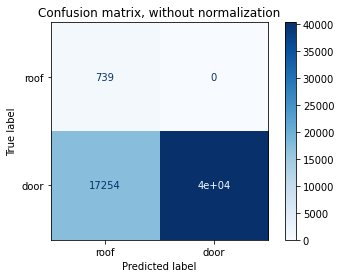

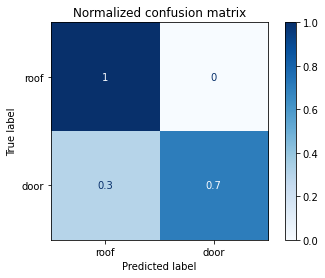

In [11]:
#confusion matrices
np.set_printoptions(precision=2)
class_names = ['roof','door']
classifier = linear_model.LogisticRegression(C=0.01).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x1, y1,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22ec9222-3a33-4967-8b6b-eec8dcc0f029' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>